In [1]:
INPUT_SHAPE = (256,256,3)
SAVE_PATH = 'results'

In [2]:
from data_generator import *

DG = DataGenerator('horse2zebra', INPUT_SHAPE[0], INPUT_SHAPE[1])
a_train, b_train, a_test, b_test = DG.get_dataset()

a_train.shape, b_train.shape, a_test.shape, b_test.shape

((1067, 256, 256, 3),
 (1067, 256, 256, 3),
 (120, 256, 256, 3),
 (120, 256, 256, 3))

In [3]:
from build_models import *

builder = BuildModel(input_shape=INPUT_SHAPE, gene_n_filters = 32, disc_n_filters=32)
gene_ab = builder.build_generator(name='G_ab')
gene_ba = builder.build_generator(name='G_ba')
disc_a = builder.build_discriminator(name='D_a')
disc_b = builder.build_discriminator(name='D_b')
disc_a.summary()

Model: "D_a"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 32)      1568      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        32832     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
instance_normalization_14 (I (None, 64, 64, 64)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)       131200  

In [4]:
from cycleGAN import *

model = CycleGAN(gene_ab, gene_ba, disc_a, disc_b, input_shape=INPUT_SHAPE, patch_shape=(16,16,1))
model.compile(tf.optimizers.Adam(0.0002, 0.5))

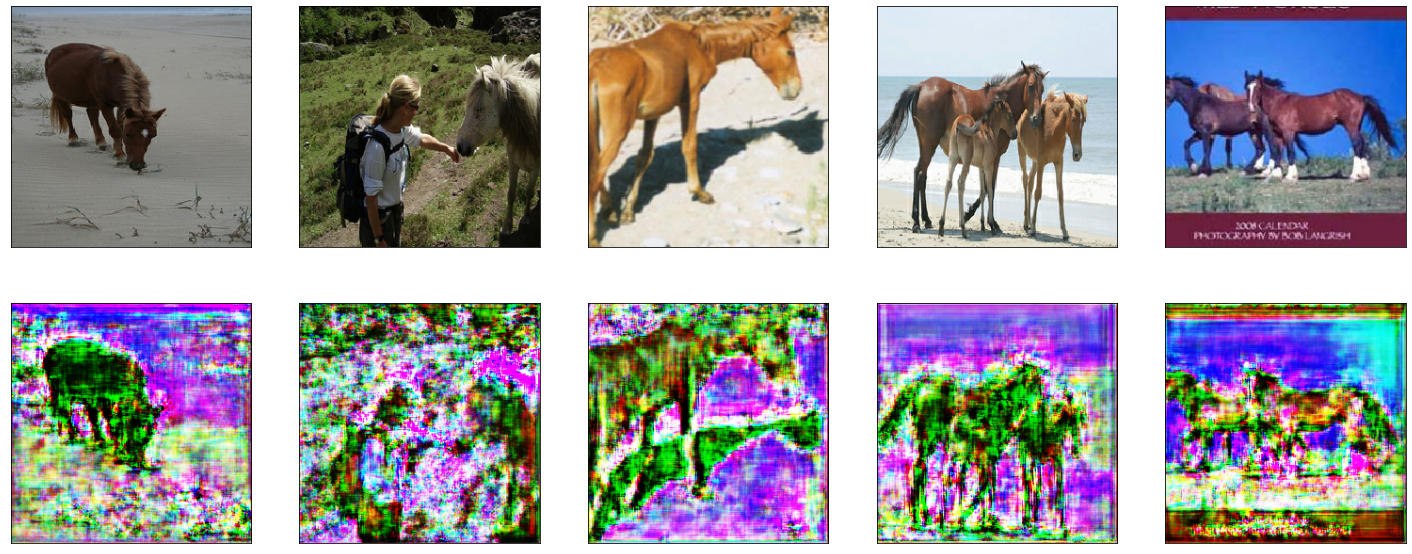

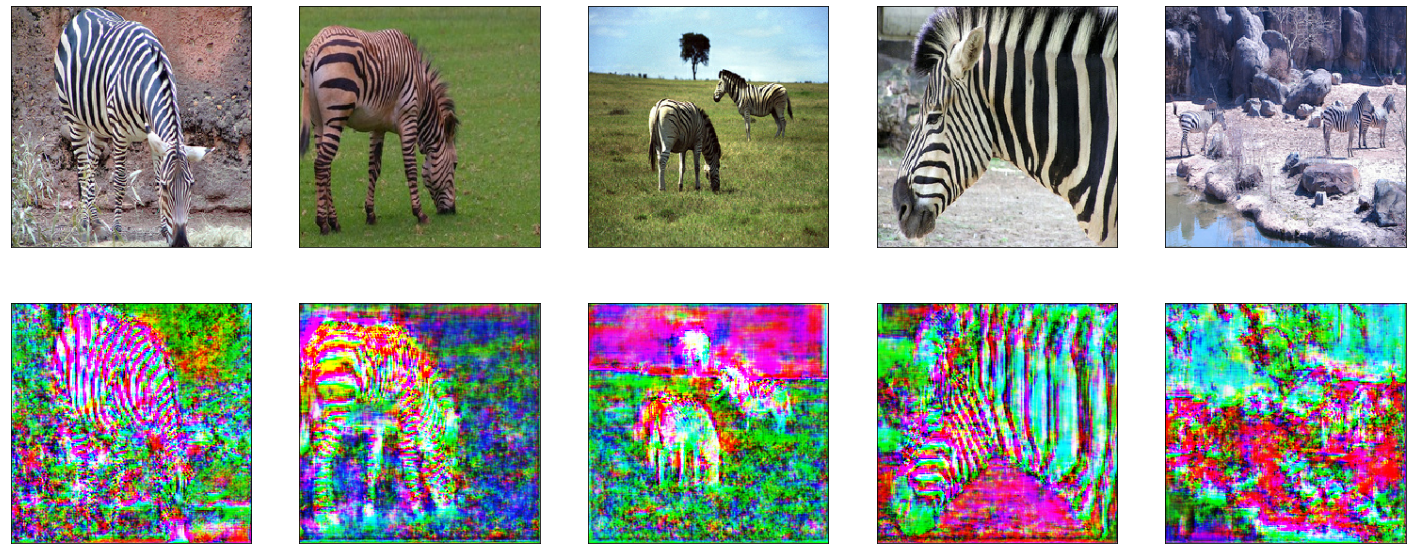

[0.53872495 0.97106934] [10.670812606811523, 0.6709346771240234, 0.6784947514533997, 0.2667546570301056, 0.2593705952167511, 0.23129652440547943, 0.21982918679714203]
* epoch 0/1:  d_loss: 42.352551, g_loss: 36127.155383, valid_loss: 877.960316, cycle_loss: 61.225510, ident_loss: 40.314056


In [15]:
history = model.fit(a_train, b_train, epochs=1, batch_size=16, img_iter=10, save_path='results')

In [5]:
model.save_model(SAVE_PATH)

In [6]:
model.plot_model(SAVE_PATH)